In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Veriseti şuradan alınmıştır: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
##### Eksik veriler için yararlanlan kaynak : https://yigitsener.medium.com/veri-biliminde-eksik-kay%C4%B1p-verilere-yakla%C5%9F%C4%B1m-stratejileri-ve-python-pandas-uygulamas%C4%B1-501fbf643795
##### Görselleştirme için yararlanılan kaynak: https://www.digitalvidya.com/blog/python-visualization/

In [4]:
base_url = "C:/Users/M E L S A/Desktop/M E L S A/data_science/datasciencetemp/data/sleep/"
sleep_dataset_url = base_url + "sleep_health_and_lifestyle_dataset.csv"
missing_sleep_dataset_url = base_url + "missing_sleep_health_and_lifestyle_dataset.csv"

In [5]:
sleep = pd.read_csv(sleep_dataset_url)
missing_sleep = pd.read_csv(missing_sleep_dataset_url)

##### Person ID (Kişi Kimliği): Her kişi için benzersiz bir tanımlayıcıdır
##### Gender (Cinsiyet): Kişinin cinsiyeti (Erkek/Kadın)
##### Age (Yaş): Kişinin yıl cinsinden yaşı
##### Occupation (Meslek): Kişinin mesleği
##### Sleep Duration (Uyku Süresi) (saat): Kişinin günde uyuduğu saat sayısı
##### Quality of Sleep (Uyku Kalitesi) (ölçek: 1-10): Uyku kalitesine ilişkin 1 ile 10 arasında değişen öznel bir derecelendirme
##### Physical Activity Level (Fiziksel Aktivite Düzeyi) (dakika/gün): Kişinin günlük olarak fiziksel aktivite yaptığı dakika sayısı
##### Stress Level (Stres Düzeyi) (ölçek: 1-10): Kişinin yaşadığı stres düzeyinin 1 ile 10 arasında değişen öznel derecelendirmesi
##### BMI Category (BMI Kategorisi): Kişinin BMI kategorisi (ör. Zayıf, Normal, Fazla Kilolu)
##### Blood Pressure (Kan Basıncı) (sistolik/diyastolik): Kişinin diyastolik basınç üzerinden sistolik basınç olarak belirtilen kan basıncı ölçümü
##### Heart Rate (Kalp Atış Hızı) (bpm): Kişinin dakikadaki atış cinsinden dinlenme halindeki kalp atış hızı
##### Daily Steps (Günlük Adımlar): Kişinin günde attığı adım sayısı
##### Sleep Disorder (Uyku Bozukluğu): Kişide bir uyku bozukluğunun varlığı veya yokluğu (Yok, Uykusuzluk, Uyku Apnesi)

In [7]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
sleep.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [9]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [10]:
sleep.shape

(374, 13)

In [11]:
sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


##### Aşağıdaki ısı haristasında her bir kolonun korelasyon (ilişki) analizi yapılmıştır ve buradan çıkan sonuçlara bakıldığında "Sleep Duration" ile "Quality Sleep" arasında neredeyse 1'e yakın doğru orantı bulunmaktadır. Aynı zamanda "Quality Sleep" ile "Stress Level" arasında ise yine 1'e yakın ters orantı bulunmaktadır.

<AxesSubplot:>

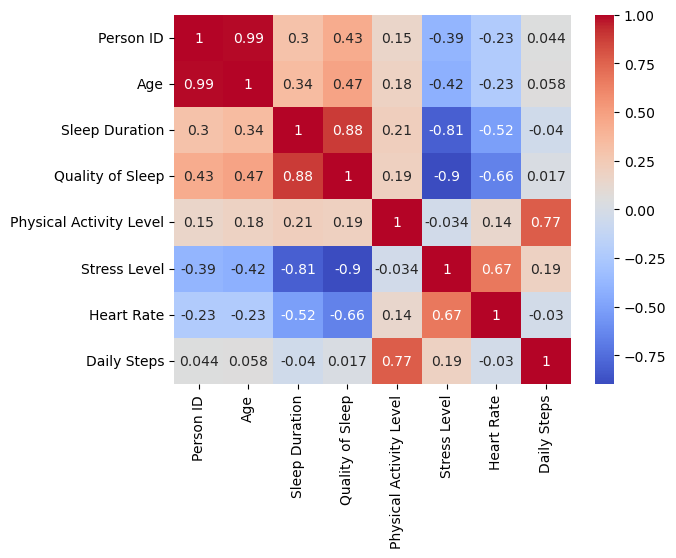

In [143]:
sns.heatmap(sleep.corr(), cmap = 'coolwarm', annot = True)
# bir ısı haritasında annot=True olarak ayarlanırsa, her hücre içine karşılık gelen değer yazılır. 
# cmap parametresi ise renk haritasını belirler.

### Eksik Veriler
##### Eksik veriler için temel olrak iki strateji bulunmaktadır: 1-Silme (Deletion) ve 2-Doldurma (İmputation)
##### Silme kendi içerisinde kolon bazlı, satır bazlı (listwise) ve eşlerin (pairwise) silinmesi olarak ayrışmaktadır. 
##### Doldurma işlemi ise Zaman Serileri için ayrı, Genel Modeller için ayrı biçimde ayrışmaktadır.

In [186]:
sleep.isnull().sum() # eksik verinin kolon bazında saydırılması
#eksik veri olmadığı için kendim bazı verileri silip yeni csv üzerinden bir doldurma yapacağım

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [22]:
missing_sleep.isnull().sum() # eksik veri oluşturduğum yeni csv üzerinden kolon bazında eksik verilere bakılması

Person ID                   0
Gender                      0
Age                         0
Occupation                  0
Sleep Duration             19
Quality of Sleep           23
Physical Activity Level     0
Stress Level                1
BMI Category                0
Blood Pressure              0
Heart Rate                  0
Daily Steps                 0
Sleep Disorder              0
dtype: int64

#### Eksik Verilerin Silinmesi
##### Satır Bazlı Silme (listwise): Bir veya daha fazla eksik değere sahip bir gözlem için o satıra ait tüm verileri kaldırır. Özellikle eksik veriler az sayıda gözlemle bulunuyorsa datadan çıkarmayı tercih edebilirsiniz. Bununla birlikte, satır silme işleminin kullanılması çoğu durumda dezavantajlıdır. Bunun nedeni satıra göre silme yöntemleri yanlı parametreler ve tahminler üretebilir.

In [30]:
ms1 = missing_sleep.dropna() # Silme fonksiyonu satır bazında
ms1[[ 'Person ID', 'Sleep Duration', 'Quality of Sleep']]

,Person ID,Sleep Duration,Quality of Sleep
0,1,6.1,6.0
1,2,6.2,6.0
5,6,5.9,4.0
6,7,6.3,6.0
7,8,7.8,7.0
...,...,...,...
368,369,8.1,9.0
369,370,8.1,9.0
371,372,8.1,9.0
372,373,8.1,9.0


##### Kolon Bazlı Silme: Aslında datada yer alan bir özelliği yani değişkeni silme işlemi. Bu genel olarak tercih edilen bir yöntem olmamakla birlikte eğer aynı değişken içerisinde eksik veri adedi 2/3'den fazla ise bu değişken veri setinden çıkarılabilir. Örneğin datasetimizde yer alan “Quality of Sleep” değişkeninin oldukça fazla kayıp veriden oluştuğunu varsayalım bu durumda tamamen aşağıdaki şekilde çıkarabiliriz.

In [33]:
ms2 = missing_sleep.drop(columns="Quality of Sleep") # silme fonksiyonu kolon bazında
ms2

,Person ID,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,NaN,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,75,3,Overweight,140/95,68,7000,Sleep Apnea


##### Eşlerin (Pairwise) Silinmesi: Bu yöntemde sadece ihtiyaç duyulan değişkenler seçilir ve bu değişkenler içindeki eksik veriler silinerek analize devam edilir.

In [18]:
ms3 = missing_sleep
ms3[[ 'Stress Level', 'Sleep Duration', 'Quality of Sleep']]

,Stress Level,Sleep Duration,Quality of Sleep
0,NaN,6.1,6.0
1,8.0,6.2,6.0
2,8.0,6.2,NaN
3,8.0,NaN,4.0
4,8.0,5.9,NaN
...,...,...,...
369,3.0,8.1,9.0
370,3.0,8.0,NaN
371,3.0,8.1,9.0
372,3.0,8.1,9.0


##### Satır silme, eksik veri içeren herhangi bir satırı silerken; Eşlerin silinmesi, yalnızca belirli sütunlarda eksik veri olan satırları siler. Yukarıda "Stress Level" kolonunun 0. indexi NaN olmasına rağmen aşağıda index silinmemiştir bu da yalnızca belirtilen kolonlarda silme işlemi yapıldığını göstermiştir.

In [24]:
ms4 = ms3[["Sleep Duration", "Quality of Sleep"]].dropna()
ms4

,Sleep Duration,Quality of Sleep
0,6.1,6.0
1,6.2,6.0
5,5.9,4.0
6,6.3,6.0
7,7.8,7.0
...,...,...
368,8.1,9.0
369,8.1,9.0
371,8.1,9.0
372,8.1,9.0


In [140]:
ms4.corr()

,Sleep Duration,Quality of Sleep
Sleep Duration,1.000000,0.888829
Quality of Sleep,0.888829,1.000000


##### Scatter, iki değişkenli verilerde bir ilişki bulmak için kullanılır. En yaygın olarak iki sürekli değişken arasındaki korelasyonları bulmak için kullanılır.
##### Veri setindeki "Quality of Sleep" (Uyku Kalitesi) ve "Sleep Duration" (Uyku Süresi) değerlerini içeren scatter plot grafiği çizildiğinde, her bir nokta bir gözlem birimini temsil eder. Her bir noktanın konumu, belirli bir "Quality of Sleep" ve "Sleep Duration" değerini gösterir. Buradan yola çıkarak grafikteki noktaların genellikle yukarı doğru bir eğilim gösterdiğini söyleyebilirim bu yüzden "Quality of Sleep" değeri arttıkça "Sleep Duration" değeri de artma eğiliminde. Mesela "Quality of Sleep" 4 iken "Sleep Duration" daha kısa değerlere sahipken kalite arttıkça "Sleep Duration" ın sayısal miktarı da artmaktadır.

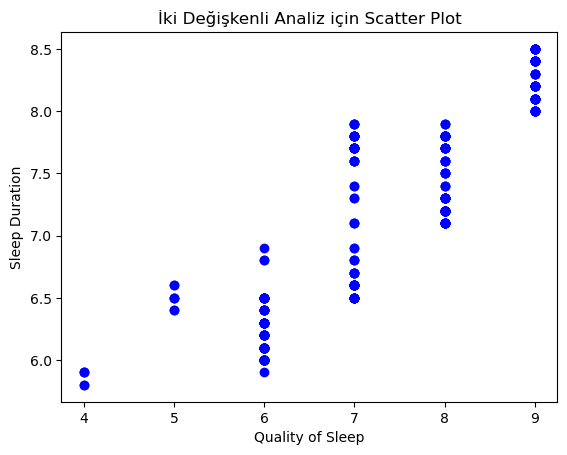

In [145]:
plt.scatter(sleep["Quality of Sleep"], sleep["Sleep Duration"], color="blue")
plt.title("İki Değişkenli Analiz için Scatter Plot")
plt.xlabel("Quality of Sleep")
plt.ylabel("Sleep Duration")
plt.show()

In [17]:
ms4.corr()

,Sleep Duration,Quality of Sleep
Sleep Duration,1.000000,0.888829
Quality of Sleep,0.888829,1.000000


#### Eksik Verilerin Doldurulması
##### Alt, Üst veya Sabit Değer ile Doldurma: Kolonda eksik verinin bulunduğu alanın altında ya da üstünde yer alan değeri ile doldurma işlemi yapılabilir. Sabit değer ise tamamen datanın nasıl yorumlandığına bağlı olarak eksik değerlere sizin belirleyeceğiniz bir sayı atanır.

In [33]:
missing_sleep['Quality of Sleep']

0      6.0
1      6.0
2      NaN
3      4.0
4      NaN
      ... 
369    9.0
370    NaN
371    9.0
372    9.0
373    9.0
Name: Quality of Sleep, Length: 374, dtype: float64

In [34]:
# üst değer ile doldurma
ms5 = missing_sleep
ms5['Quality of Sleep'].fillna(method="ffill") 


0      6.0
1      6.0
2      6.0
3      4.0
4      4.0
      ... 
369    9.0
370    9.0
371    9.0
372    9.0
373    9.0
Name: Quality of Sleep, Length: 374, dtype: float64

In [35]:
# Alt değer ile doldurma
ms6 = missing_sleep
ms6['Quality of Sleep'].fillna(method="bfill")

0      6.0
1      6.0
2      4.0
3      4.0
4      4.0
      ... 
369    9.0
370    9.0
371    9.0
372    9.0
373    9.0
Name: Quality of Sleep, Length: 374, dtype: float64

In [171]:
# Sabit değer atama
ms7 = missing_sleep
ms7['Quality of Sleep'].fillna(value= "19.02")

0        6.0
1        6.0
2      19.02
3        4.0
4      19.02
       ...  
369      9.0
370    19.02
371      9.0
372      9.0
373      9.0
Name: Quality of Sleep, Length: 374, dtype: object

In [183]:
sleep['Quality of Sleep']

0      6
1      6
2      6
3      4
4      4
      ..
369    9
370    9
371    9
372    9
373    9
Name: Quality of Sleep, Length: 374, dtype: int64

##### Ortalama, Medyan, Tepe Değer(Mode): Değişkenin genel gidişatına bakarak bu yöntemlerden birisi kullanarak eksik veri doldurulabilir. Çoğunlukla veri bilimi alanında bu yöntemler tercih edilmektedir. Tek dezavantajı ise değişkenin varyans değerini düşürdüğü söylenebilir. 

In [7]:
ms8 = missing_sleep
ms8['Quality of Sleep']

0      6.0
1      6.0
2      NaN
3      4.0
4      NaN
      ... 
369    9.0
370    NaN
371    9.0
372    9.0
373    9.0
Name: Quality of Sleep, Length: 374, dtype: float64

In [8]:
#Ortalama
ms8_mean = ms8[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].mean()
ms8_mean

Age                          42.184492
Sleep Duration                7.137746
Quality of Sleep              7.324786
Physical Activity Level      59.171123
Stress Level                  5.383378
Heart Rate                   70.165775
Daily Steps                6816.844920
dtype: float64

In [9]:
ms_mean = ms8.fillna(ms8_mean)
ms_mean['Quality of Sleep']

0      6.000000
1      6.000000
2      7.324786
3      4.000000
4      7.324786
         ...   
369    9.000000
370    7.324786
371    9.000000
372    9.000000
373    9.000000
Name: Quality of Sleep, Length: 374, dtype: float64

In [10]:
# Medyan
ms8_median = ms8[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].median()
ms8_median


Age                          43.0
Sleep Duration                7.2
Quality of Sleep              7.0
Physical Activity Level      60.0
Stress Level                  5.0
Heart Rate                   70.0
Daily Steps                7000.0
dtype: float64

In [126]:
ms_median = ms8.fillna(ms8_median)
ms_median['Quality of Sleep']

0      6.0
1      6.0
2      7.0
3      4.0
4      7.0
      ... 
369    9.0
370    7.0
371    9.0
372    9.0
373    9.0
Name: Quality of Sleep, Length: 374, dtype: float64

In [44]:
# Tepe değer - Mode
ms8_mode = ms8[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].mode()
ms8_mode

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,43,7.2,8.0,60,3.0,68,8000


In [50]:
ms_mode = ms8.fillna(ms8_mode)
ms_mode['Quality of Sleep'].fillna(ms8_mode['Quality of Sleep'][0], inplace=True)
# [0], Mod hesaplandığında olası birden fazla mod olabilir bu durumda en küçük değeri seçmek için 0. indexteki mod değeri alınır
# inplace=True: Doldurma işleminin ms_mode DataFrame'ini değiştirmesi ve yeni bir DataFrame döndürmesi gerektiğini belirtir.
#ms_mode['Sleep Duration'].fillna(ms8_mode['Sleep Duration'][0], inplace=True)
ms_mode[['Quality of Sleep','Sleep Duration']]

,Quality of Sleep,Sleep Duration
0,6.0,6.1
1,6.0,6.2
2,8.0,6.2
3,4.0,NaN
4,8.0,5.9
...,...,...
369,9.0,8.1
370,8.0,8.0
371,9.0,8.1
372,9.0,8.1


##### Lineer (Doğrusal) Regresyon: Aslında bu yöntem tamamen regresyon modelinin eksik verilere uygulanmış halidir. Eksik değerlerin yer aldığı kolon bağımlı değişken olarak ve diğer kolonlar bağımsız değişken olarak tanımlanarak kayıp veriler tahmin edilmeye çalışılır. Bu yöntemin dezavantajlarından birisi, eksik verilerin regresyon ile diğer değişkenlere göre doldurulacak olmasından dolayı asıl tahmin edilecek değişken üzerinde veri setinde aşırı öğrenme (overfitting) söz konusu olabilir.

In [136]:
# Lineer regresyon yöntemi
ms8_reg = ms8[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].interpolate(method="linear")
ms8_reg

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,27,6.10,6.0,42,NaN,77,4200
1,28,6.20,6.0,60,8.0,75,10000
2,28,6.20,5.0,60,8.0,75,10000
3,28,6.05,4.0,30,8.0,85,3000
4,28,5.90,4.0,30,8.0,85,3000
...,...,...,...,...,...,...,...
369,59,8.10,9.0,75,3.0,68,7000
370,59,8.00,9.0,75,3.0,68,7000
371,59,8.10,9.0,75,3.0,68,7000
372,59,8.10,9.0,75,3.0,68,7000


##### Kategorik Verilerde Doldurma: Genel olarak üç yöntemden söz edilebilir: 1 - Tepe değer(mode) kullanılarak en fazla frekansa sahip olan değer ile eksik veriler doldurulabilir. 2- Eksik/kayıp veriler etiketlenerek model ya da analiz için değerlendirilebilir. 3 - Lojistik regresyon ya da ANOVA gibi yöntemler ile eksik değerler tahmin edilebilir.

### Veri Görselleştirme

##### Histogram, sürekli bir değişkenin dağılımını gösterir. Tek değişkenli bir analizde tek bir değişkenin frekans dağılımını gösterir. 
##### Bu verisetindeki insanların genel olarak hangi yaş aralığında ve hangi miktarlarda olduğunu görebilmek adına histogram kullanılmıştır ve gafikten de anlaşılacağı üzere yaş aralığının 40-45 arasında 45'e daha yakın bir yaş değerinde kişiler çok sayıda bulunmaktadır. Daha önce medyanı alındığında da bu değerin 43 çıktığı gözlemlenmişti.

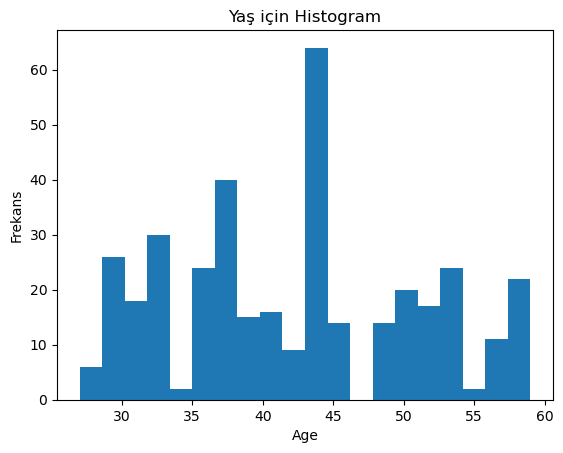

In [191]:
plt.hist(sleep['Age'], bins = 20)
plt.title("Yaş için Histogram")
plt.xlabel("Age")
plt.ylabel("Frekans")
plt.show()

##### Aşağıda cinsiyetlere göre uyku kalitesinin nasıl bir dağılım gösterdiğini görebilmek amacıyla bir countplot oluşturulmuştur ve bu grafikten anlaşılacağı üzere kadın ve erkekler için dağılımın 4, 5 ve 7 için benzerlik gösterirken diğer değerler için farklılık göstermiştir.

Text(0.5, 1.0, 'Cinsiyet ve Uyku Kalitesi Frekansları')

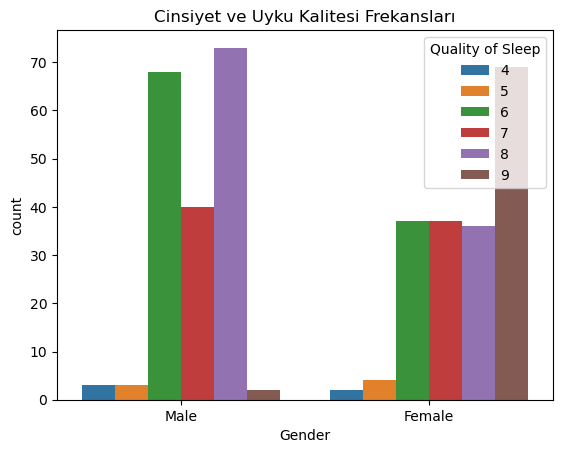

In [202]:
sns.countplot(x='Gender', hue='Quality of Sleep', data=sleep)
plt.title('Cinsiyet ve Uyku Kalitesi Frekansları')

##### Pasta Grafiği, kategorik verilerdeki her bir kategorinin oranını temsil etmek için kullanılan bir grafik türüdür. Pastanın tamamı kategori sayısına eşit dilimlere bölünür.
##### Aşağıdaki pasta grafiğinde verisetindeki meslek gruplarının miktarı yüzdelik olarak görselleştirilmiştir. Grafiğe göre verisetinde en çok hemşireler en az da yöneticiler yer almaktadır.

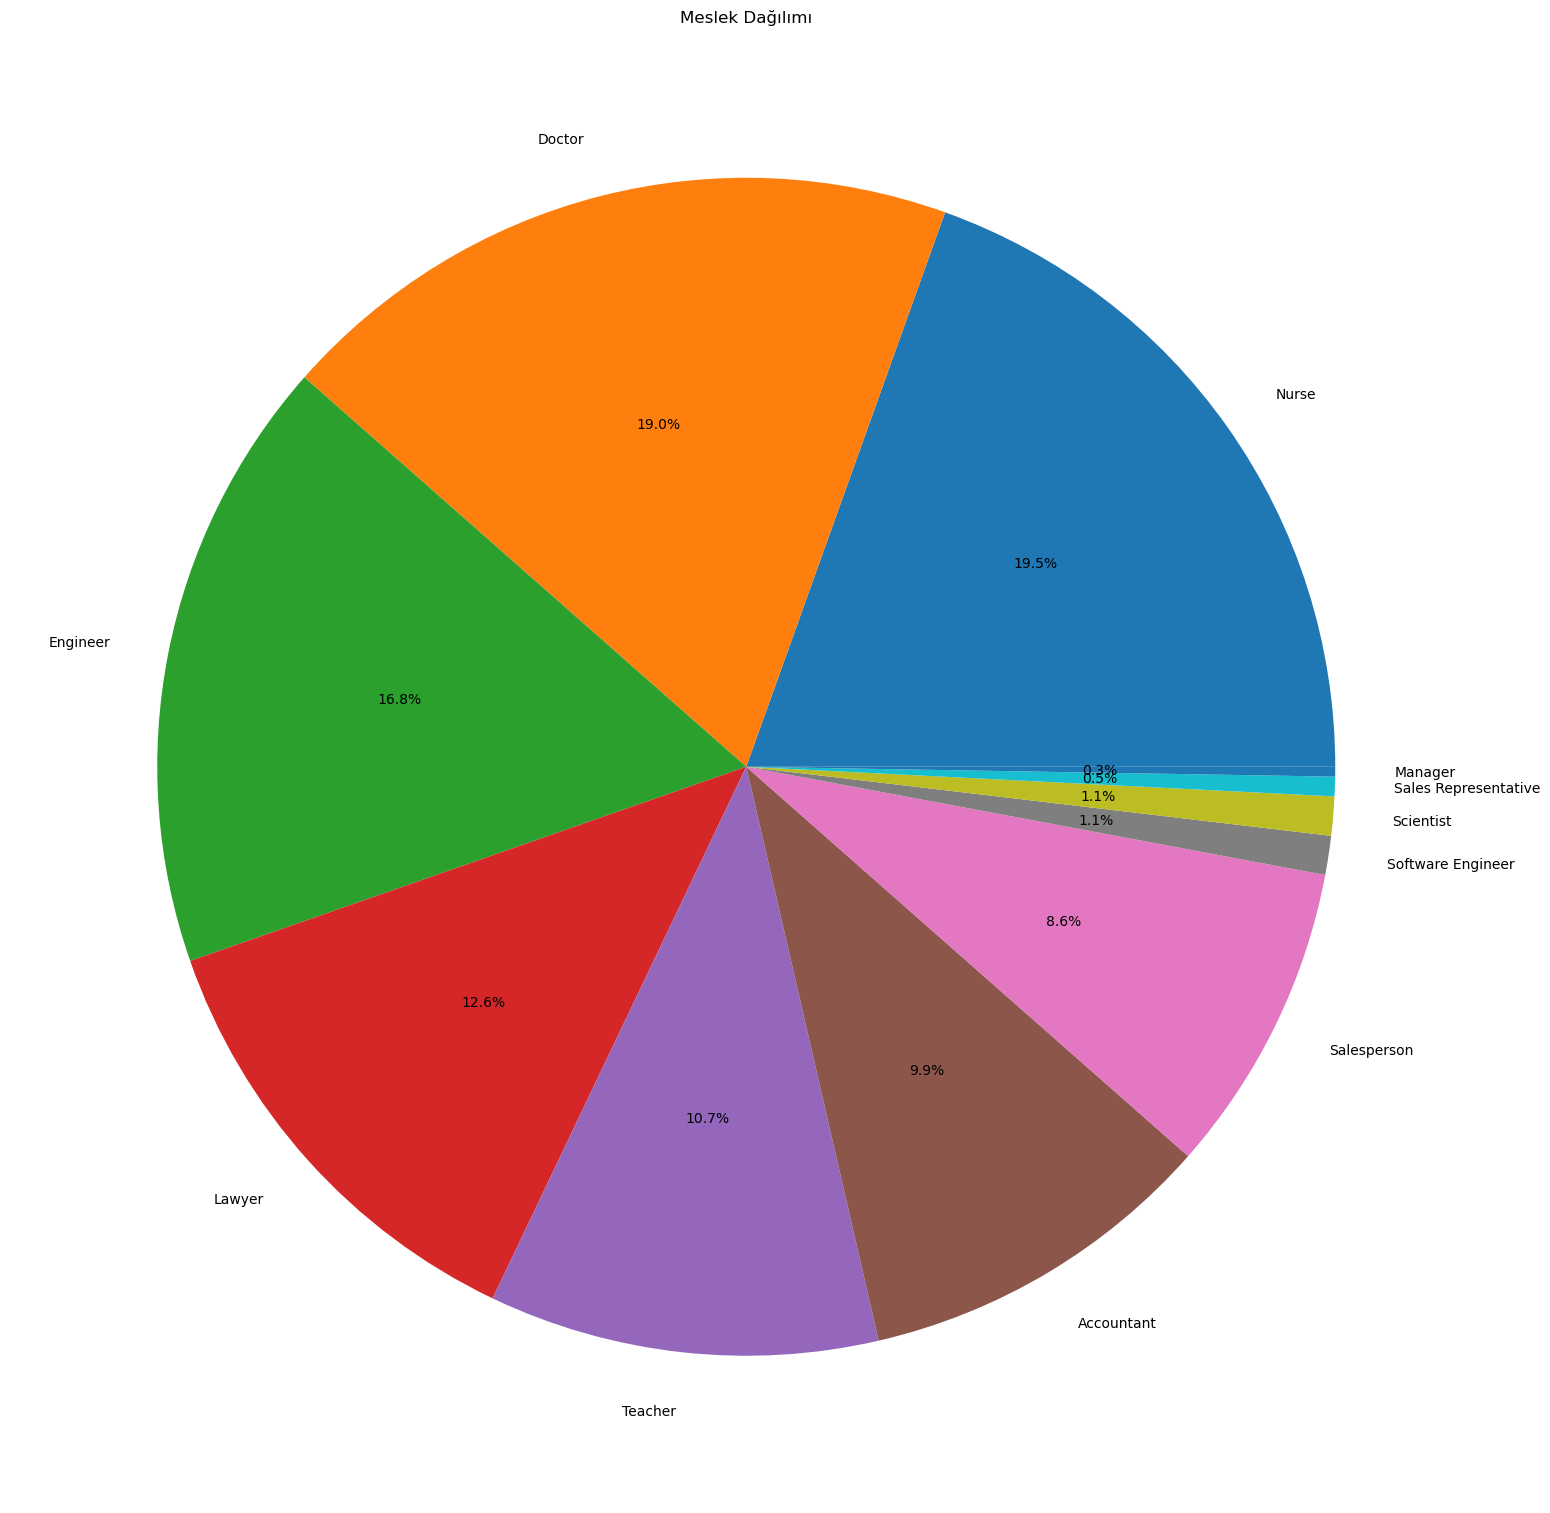

In [234]:
occupation_counts = sleep['Occupation'].value_counts()
plt.figure(figsize=(19, 23)) 
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.title('Meslek Dağılımı')
plt.show()

In [51]:
sleep[['Physical Activity Level','Daily Steps']]

,Physical Activity Level,Daily Steps
0,42,4200
1,60,10000
2,60,10000
3,30,3000
4,30,3000
...,...,...
369,75,7000
370,75,7000
371,75,7000
372,75,7000


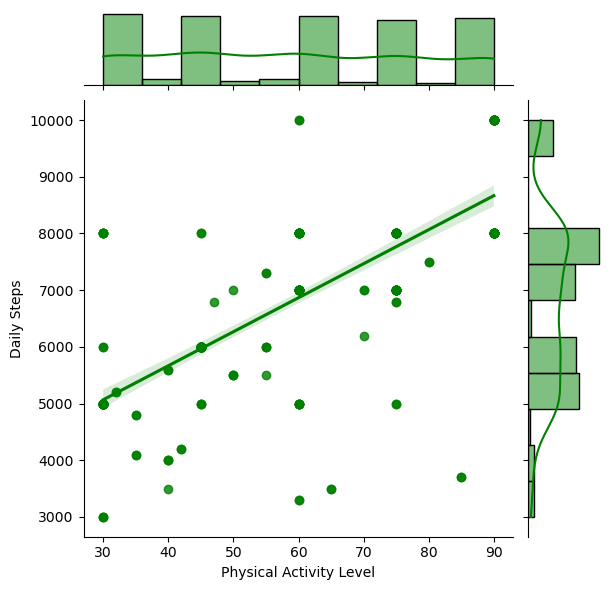

In [52]:
sns.jointplot(x='Physical Activity Level', y='Daily Steps', data = sleep, kind='reg', color='green')

##### Aşağıdaki grafikten anlaşılacağı üzere, "Uyku Kalitesi"ne 8 verenler çoğunlukla herhangi bir "Uyku Apnesi" ile karşılaşmamaktadır ancak ilginç olan tarafı 9 veren adayların "Uyku Apnesi" problemiyle, hiç problem yaşamayanlar arasında neredeyse aynı oranlarda olmasına rağmen uyku kalitelerine en yüksek noktada derecenlendirme yapmış olmalarıdır.

Text(0.5, 1.0, 'Uyku Kalitesi ile Uyku Apnesi')

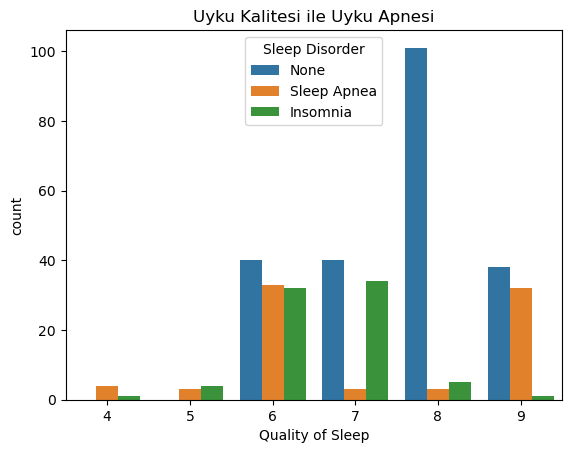

In [249]:
sns.countplot(x='Quality of Sleep', hue='Sleep Disorder', data=sleep)
plt.title("Uyku Kalitesi ile Uyku Apnesi")